In [14]:
using PyPlot, NNlib,  ImageFiltering, Images, MEngProject, MEngProject.LamKernels, MEngProject.Laminart, MEngProject.Utils

┌ Info: Precompiling MEngProject [d0493a11-efc0-4c7c-9b66-d0bd5a04cc55]
└ @ Base loading.jl:1260
┌ Warning: Package MEngProject does not have NNlib in its dependencies:
│ - If you have MEngProject checked out for development and have
│   added NNlib as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with MEngProject
└ Loading NNlib into MEngProject from project dependency, future warnings for MEngProject are suppressed.


In [15]:
σ_2 = 0.5
θ = pi/3
K = 12;

In [99]:
tempa = [1.0 1.0 1.0 1.0 1.0]
tempaa = tempa .* transpose(tempa)
temp1d = reshape(Array{eltype(tempa)}(undef, size(tempa)[1], size(tempa)[2]*K),size(tempa)[1],size(tempa)[2],K);
temp2d = reshape(Array{eltype(tempaa)}(undef, size(tempaa)[1], size(tempaa)[2]*K),size(tempaa)[1],size(tempaa)[2],K);

## d_pv (1x5)

$$\exp{((- x \cos \theta) / 2 \sigma)}$$

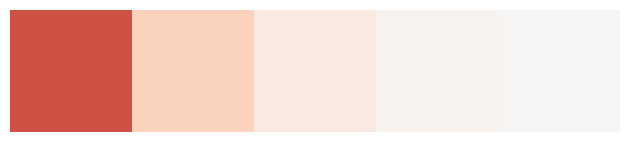

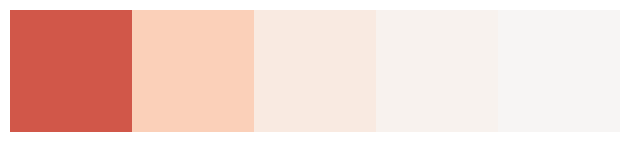

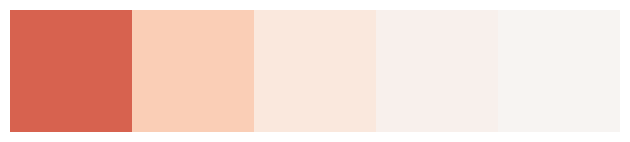

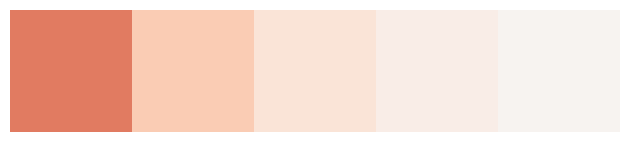

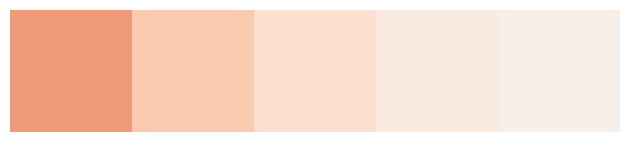

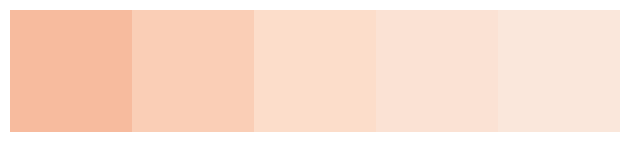

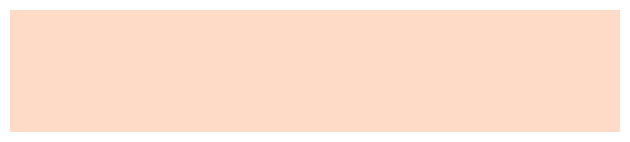

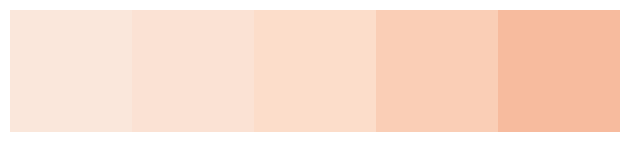

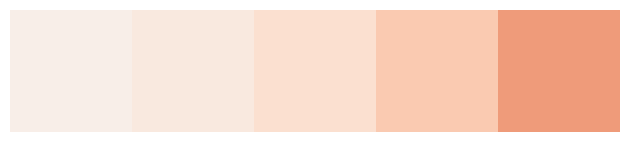

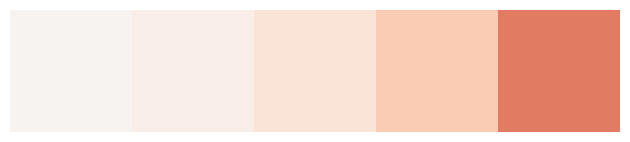

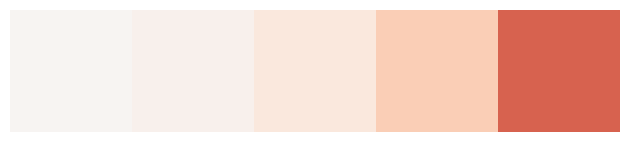

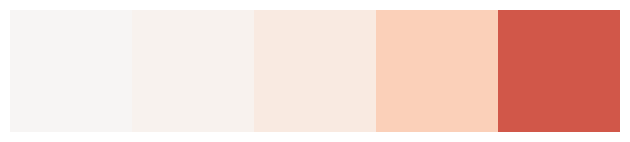

In [114]:
for k=1:1:K
    θ = π*(k-1)/K
    temp1d[:,:,k] = LamKernels.kern_d_pv(σ_2, θ)
end
Utils.save_orientations_rb(temp1d, "kern_d_pv", -1, 1)


## d_ph (1x5)

$$\exp{((- x \sin \theta) / 2 \sigma)}$$

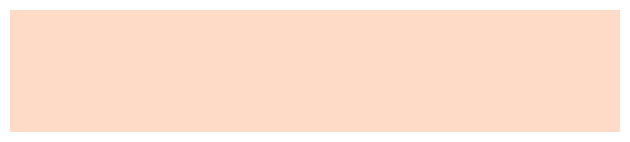

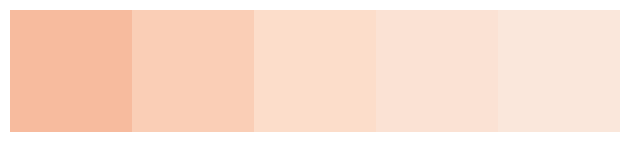

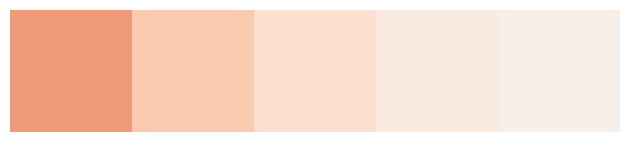

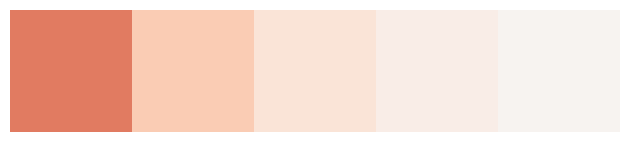

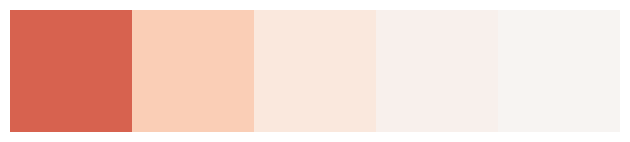

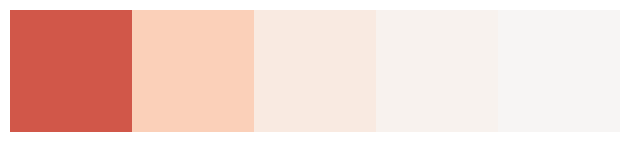

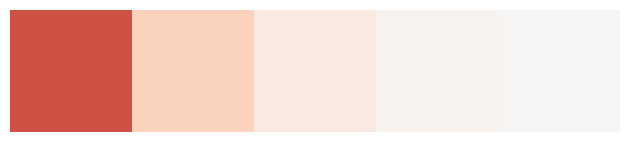

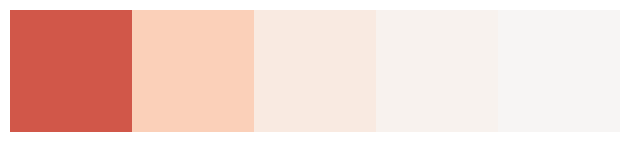

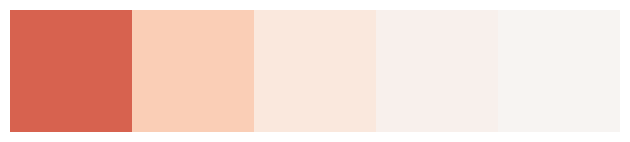

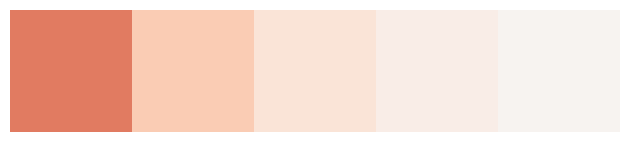

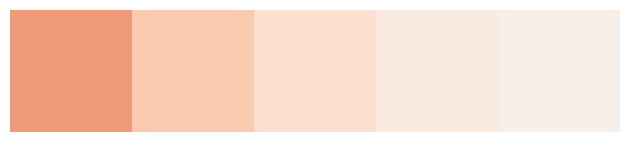

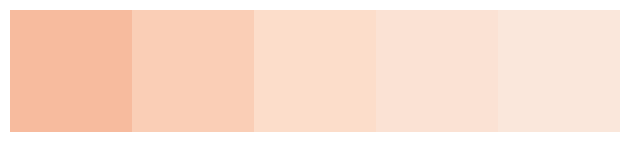

In [115]:
for k=1:1:K
    θ = π*(k-1)/K
    temp1d[:,:,k] = LamKernels.kern_d_ph(σ_2, θ)
end
Utils.save_orientations_rb(temp1d, "kern_d_ph")

## d_mv (1x5)

$$\exp{((x \cos \theta) / 2 \sigma)}$$

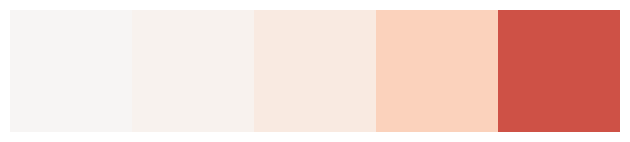

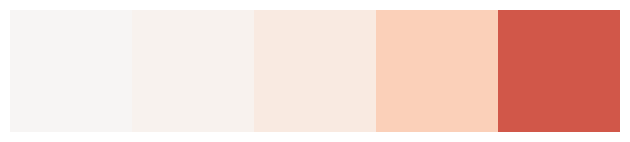

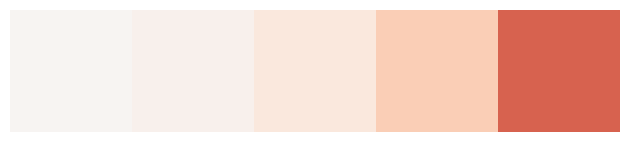

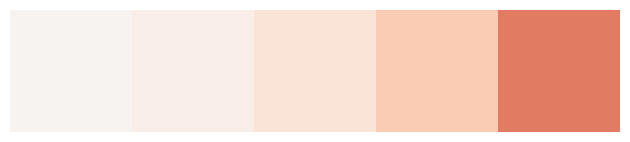

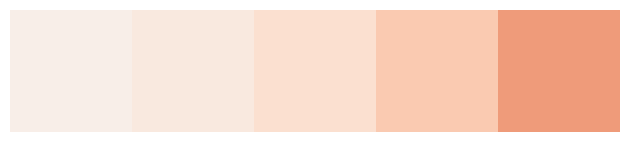

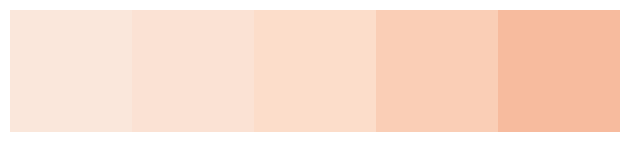

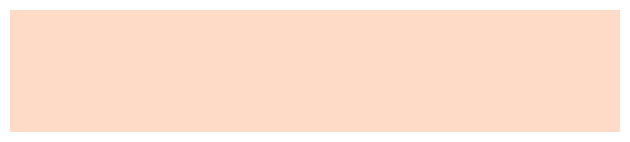

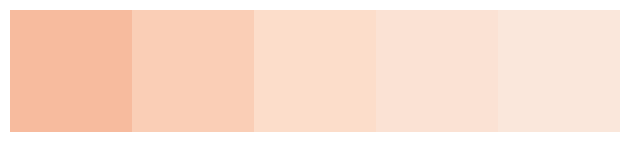

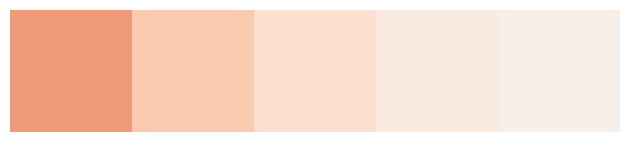

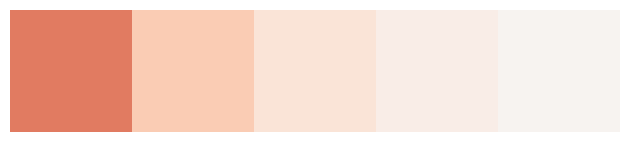

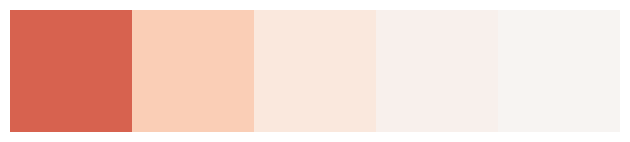

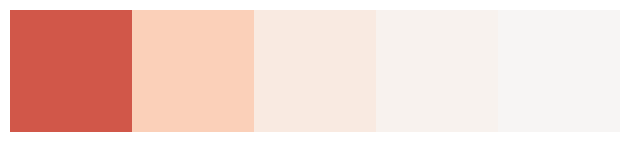

In [116]:
for k=1:1:K
    θ = π*(k-1)/K
    temp1d[:,:,k] = LamKernels.kern_d_mv(σ_2, θ)
end
Utils.save_orientations_rb(temp1d, "kern_d_mv")

## d_mh (1x5)

$$\exp{((x \cos \theta) / 2 \sigma)}$$

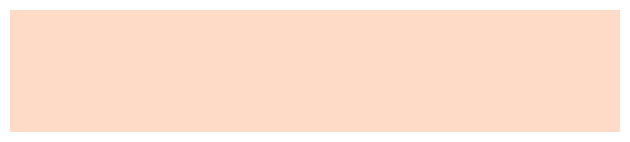

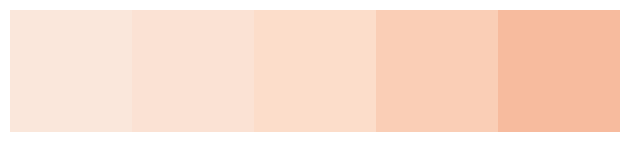

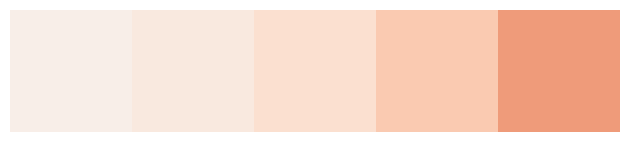

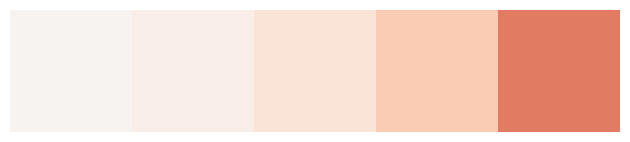

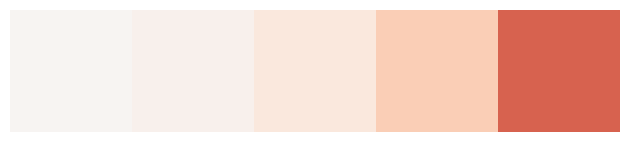

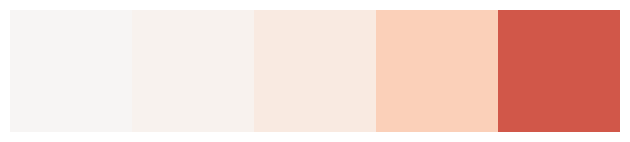

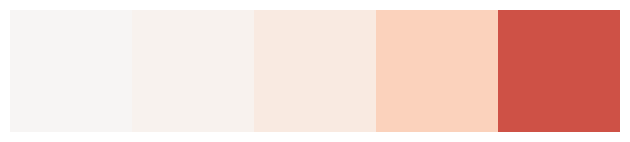

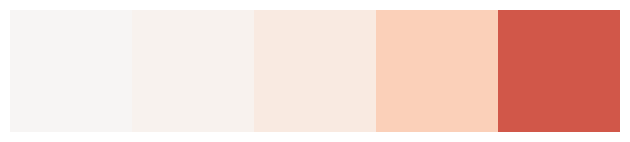

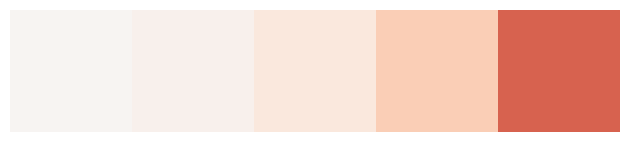

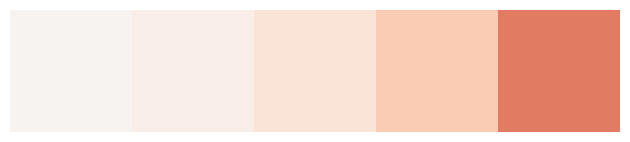

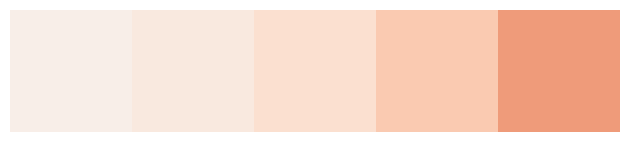

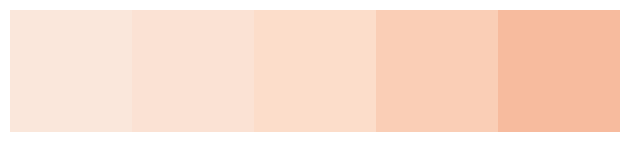

In [117]:
for k=1:1:K
    θ = π*(k-1)/K
    temp1d[:,:,k] = LamKernels.kern_d_mh(σ_2, θ)
end
Utils.save_orientations_rb(temp1d, "kern_d_mh")

## d_p (1x5)

$$\exp{((- x \cos \theta - y \sin \theta) / 2 \sigma)}$$

$$=d\_pv\times d\_ph^T$$

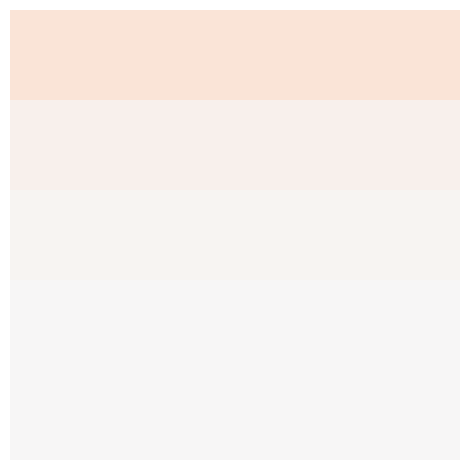

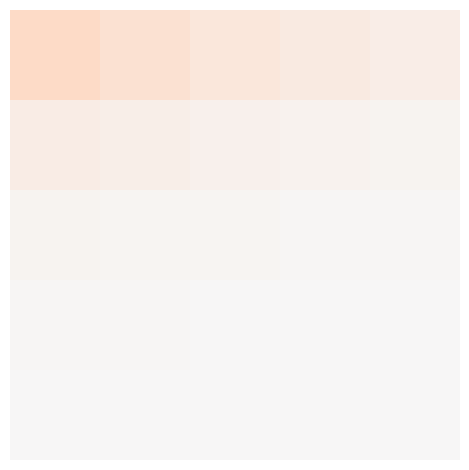

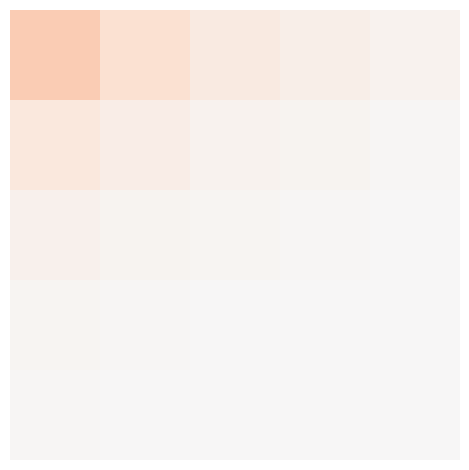

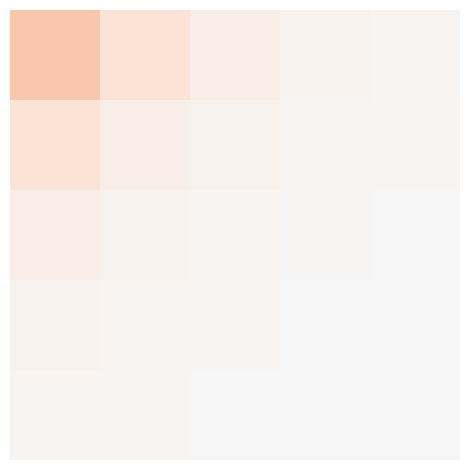

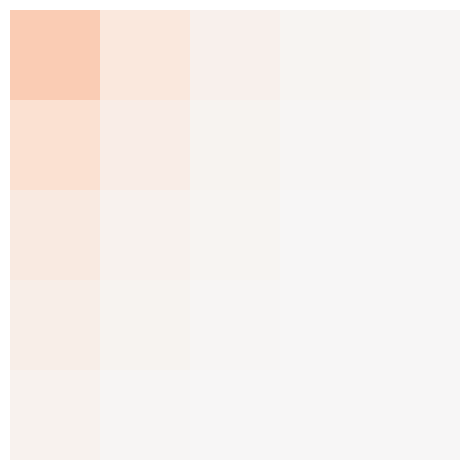

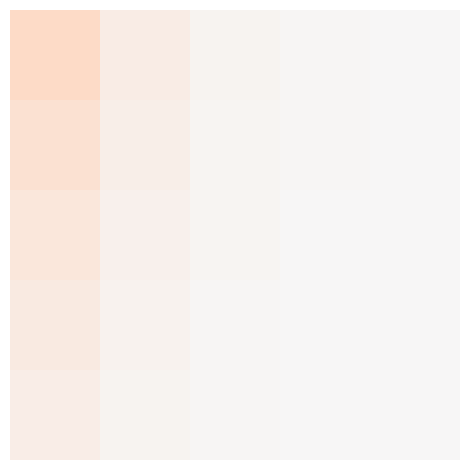

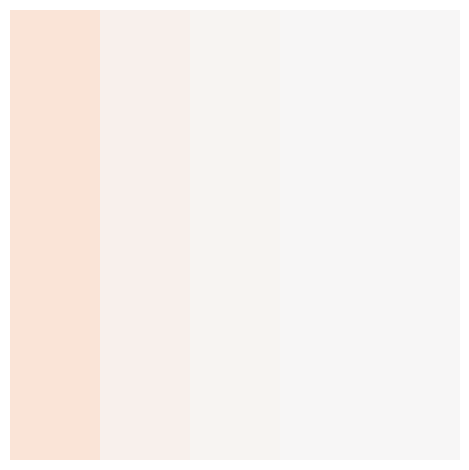

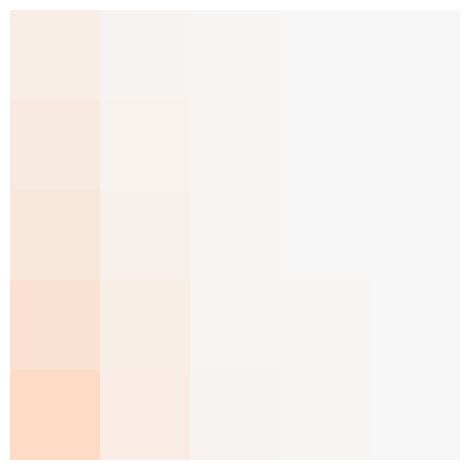

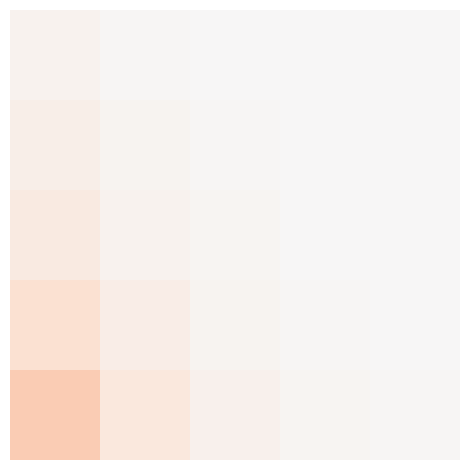

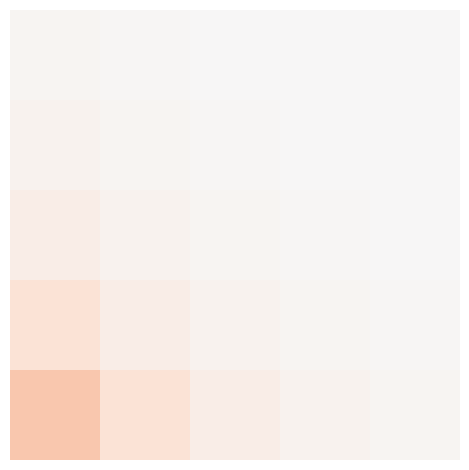

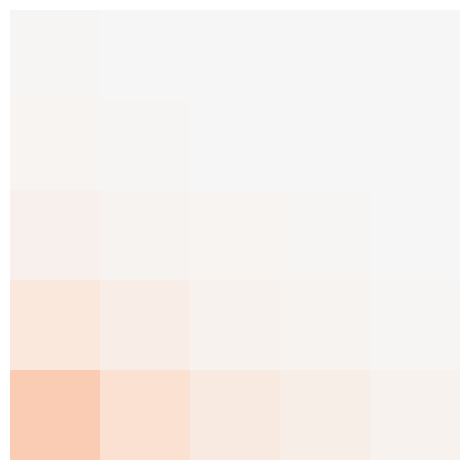

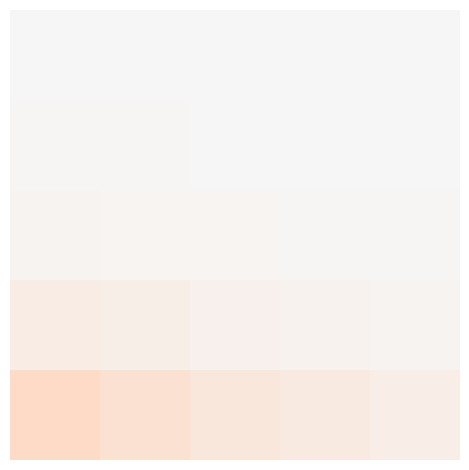

In [123]:
for k=1:1:K
    θ = π*(k-1)/K
    temp2d[:,:,k] = LamKernels.kern_d_p(σ_2, θ)
end
Utils.save_orientations_rb(temp2d, "kern_d_p")

## d_m (5x5)

$$-\exp{(( x \cos \theta + y \sin \theta) / 2 \sigma)}$$

$$=d\_mv\times d\_mh^T$$

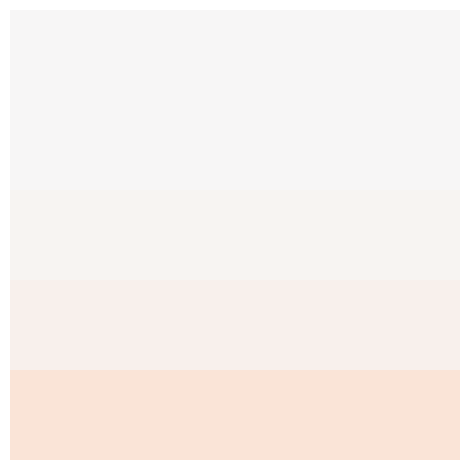

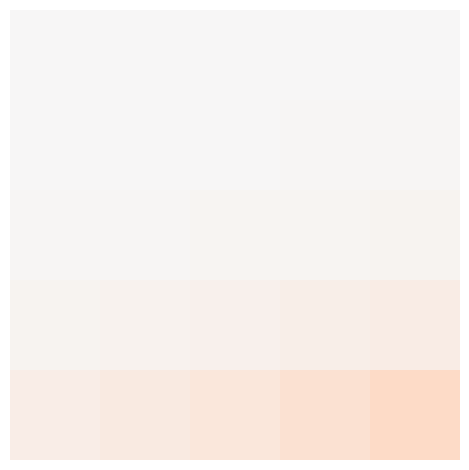

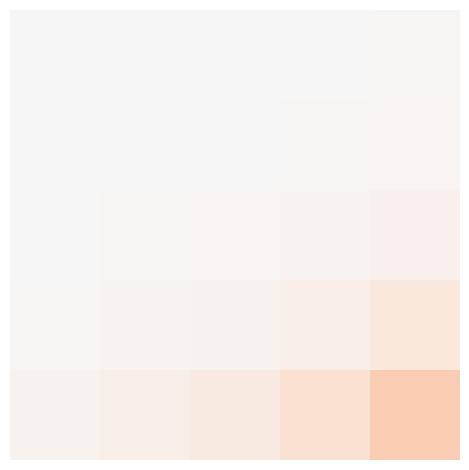

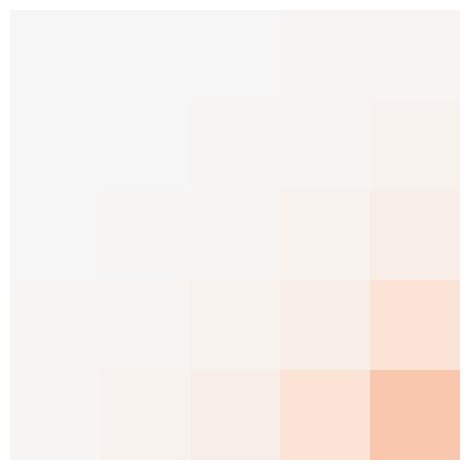

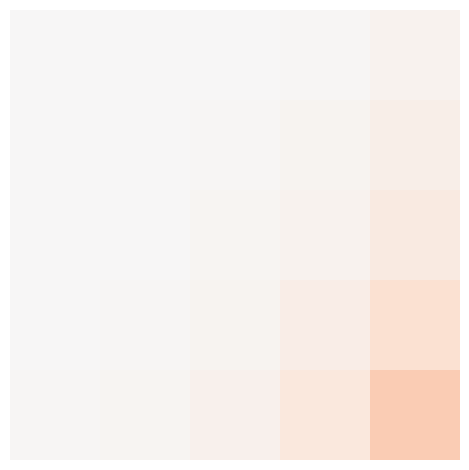

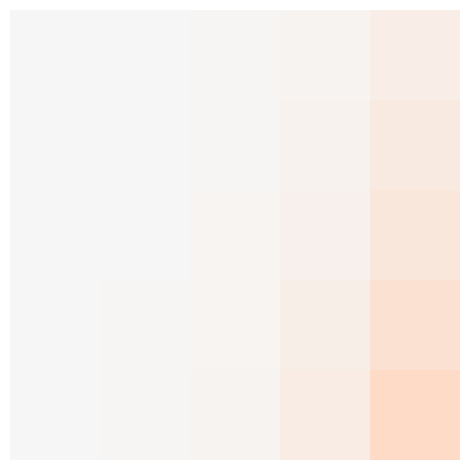

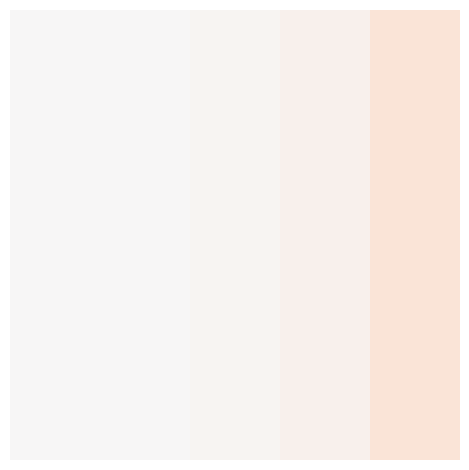

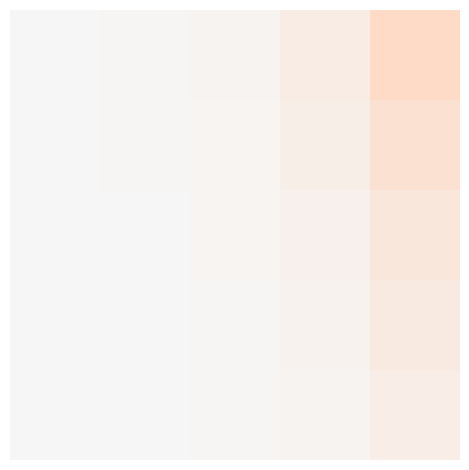

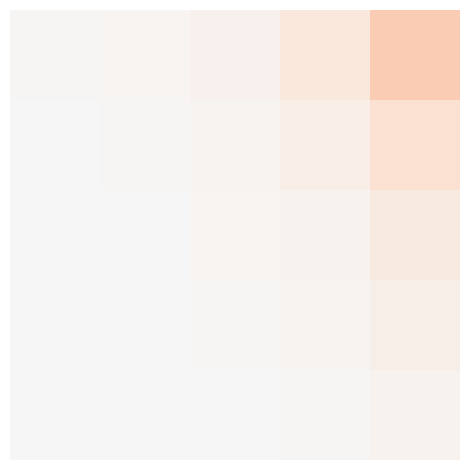

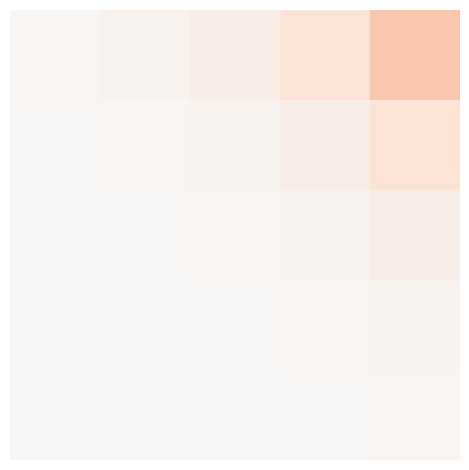

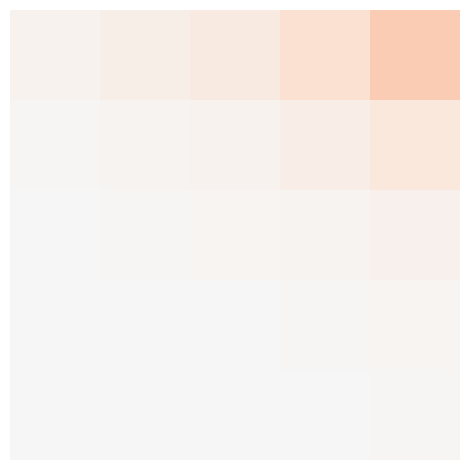

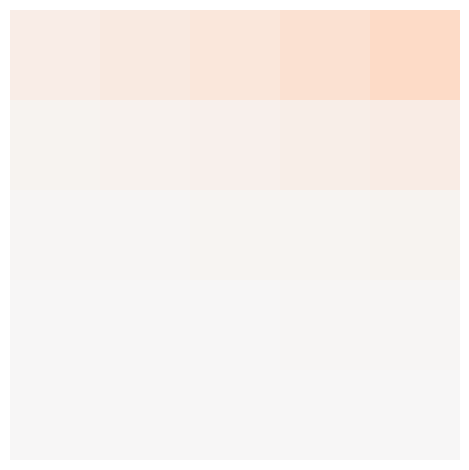

In [124]:
for k=1:1:K
    θ = π*(k-1)/K
    temp2d[:,:,k] = LamKernels.kern_d_m(σ_2, θ)
end
Utils.save_orientations_rb(temp2d, "kern_d_m")

## d (5x5)

$$\exp{((- x \cos \theta - y \sin \theta) / 2 \sigma)} - \exp{((x \cos \theta +y \sin \theta) / 2 \sigma)}$$

$$=d\_p - d\_m$$

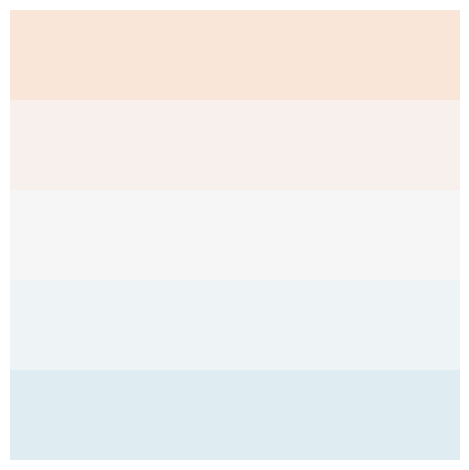

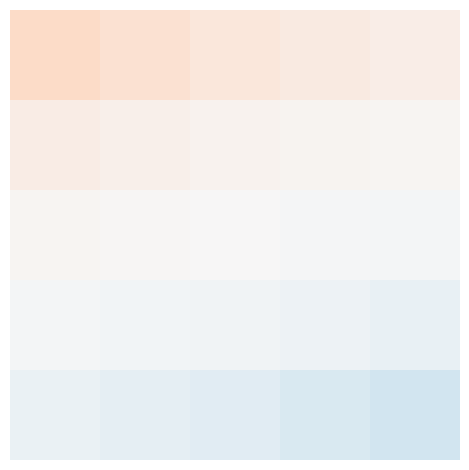

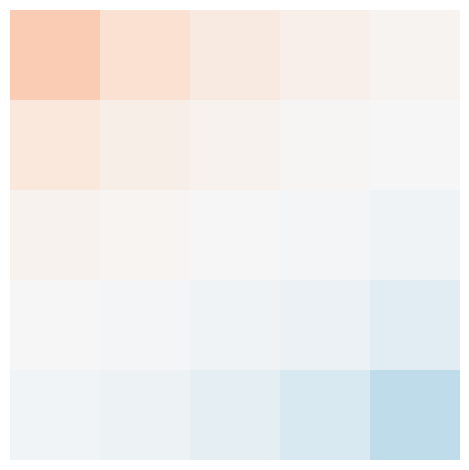

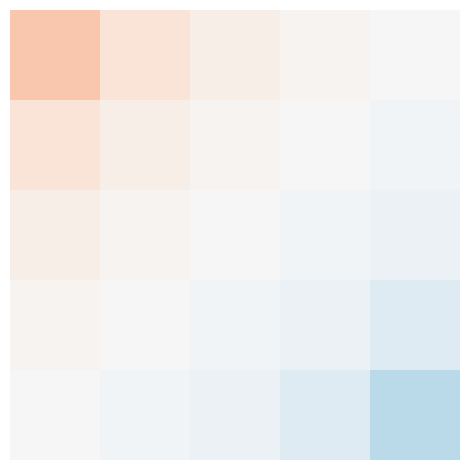

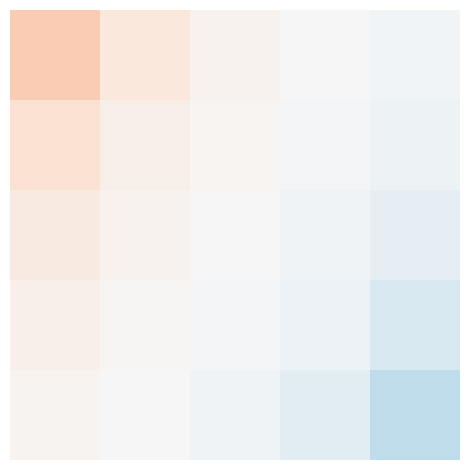

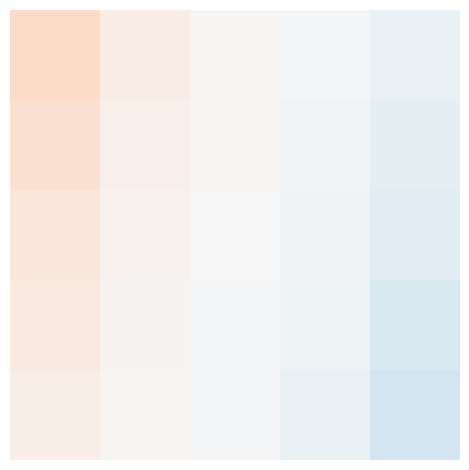

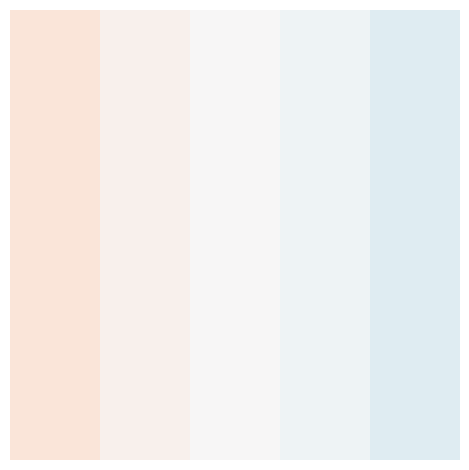

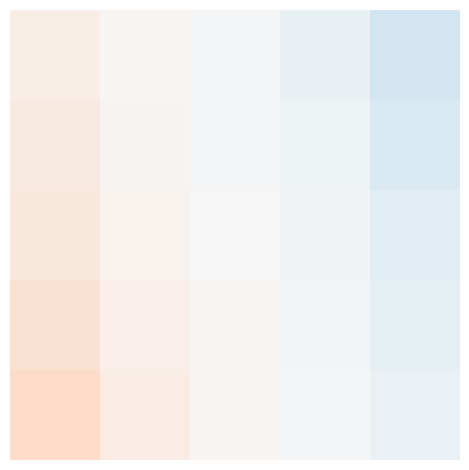

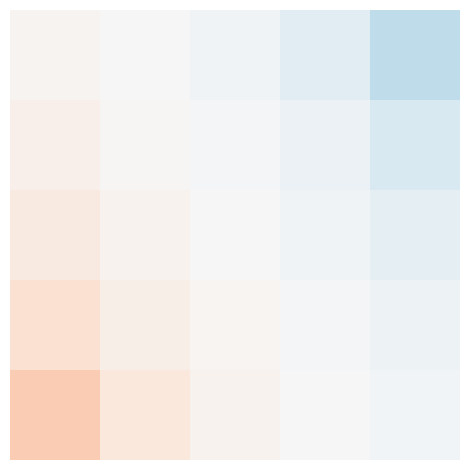

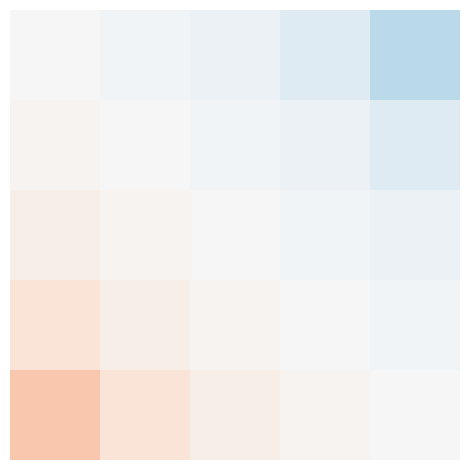

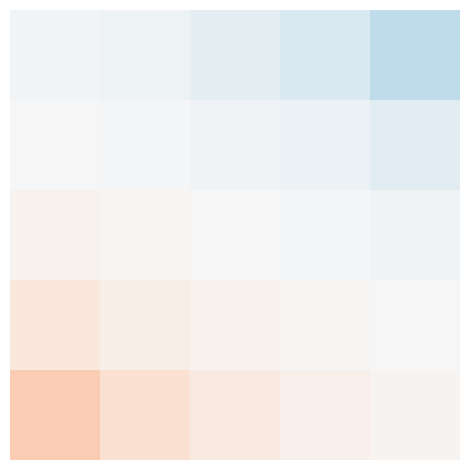

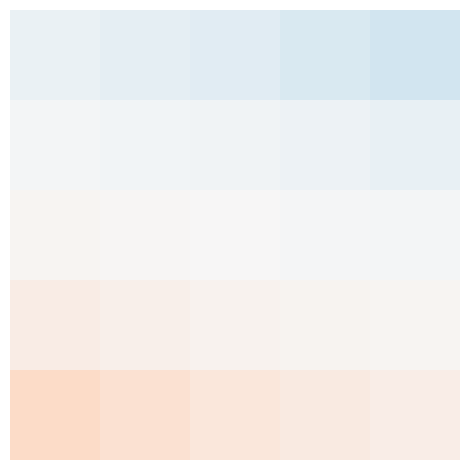

In [125]:
for k=1:1:K
    θ = π*(k-1)/K
    temp2d[:,:,k] = LamKernels.kern_d(σ_2, θ)
end
Utils.save_orientations_rb(temp2d, "kern_d")

## a (5x5)

$$[d]+[-d]$$

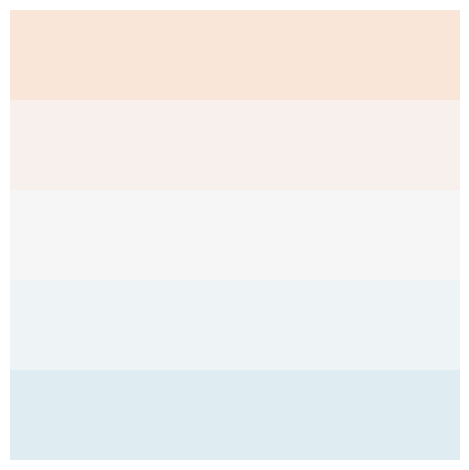

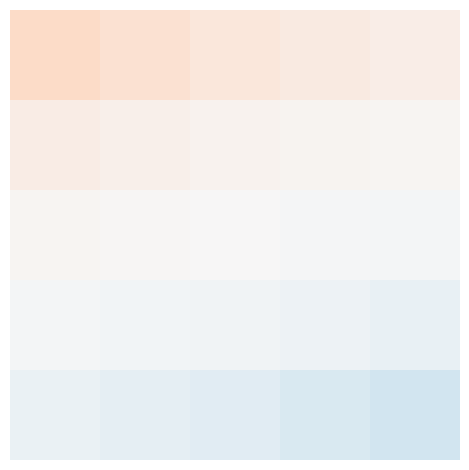

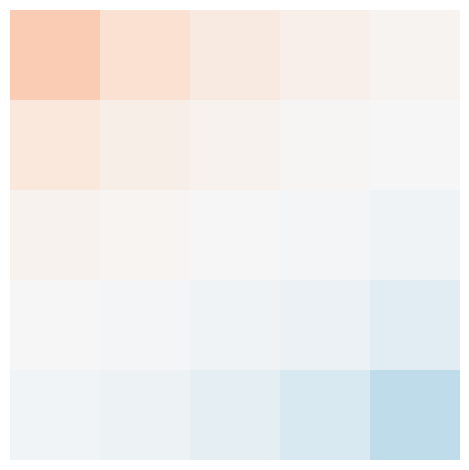

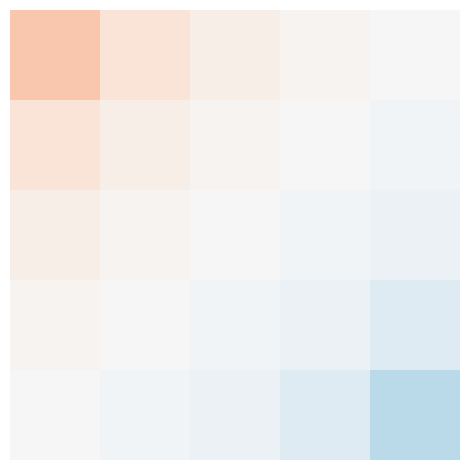

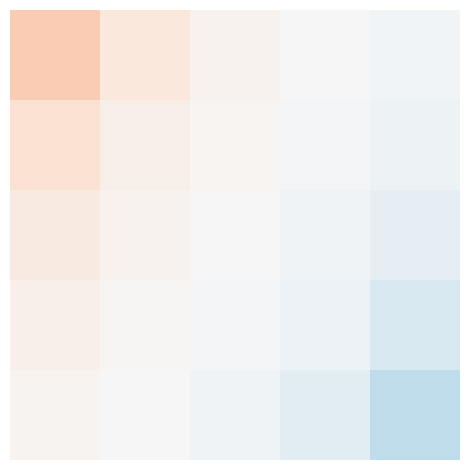

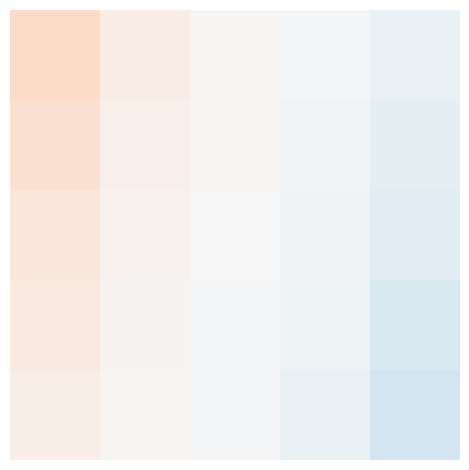

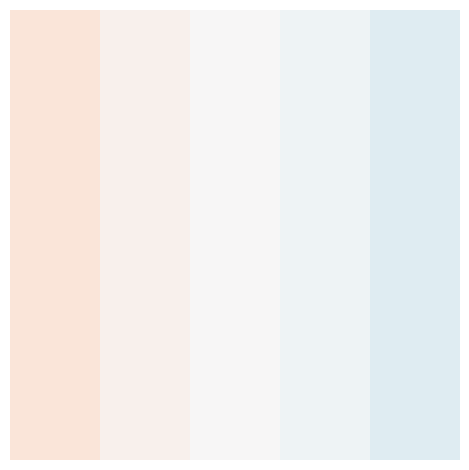

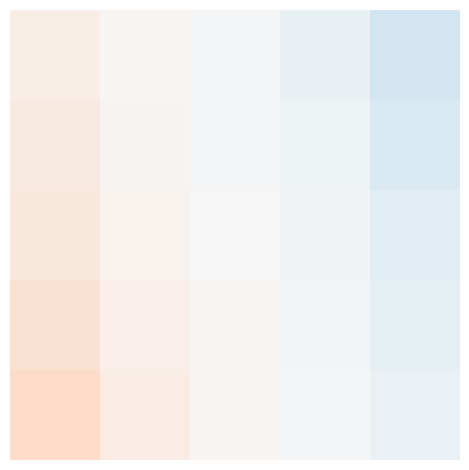

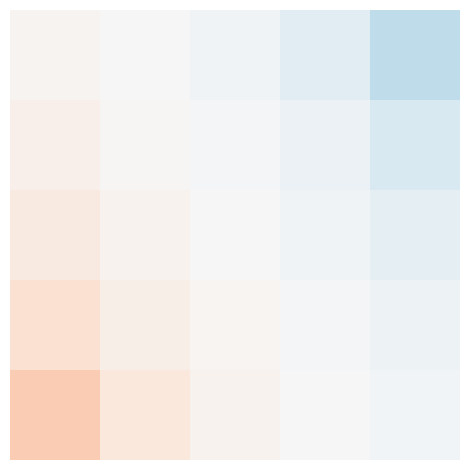

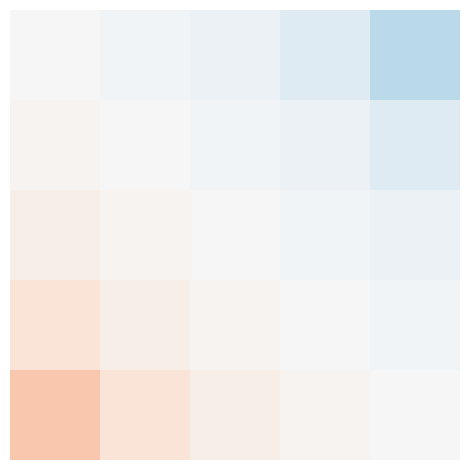

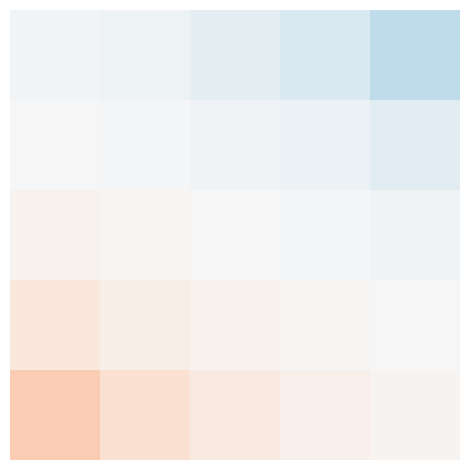

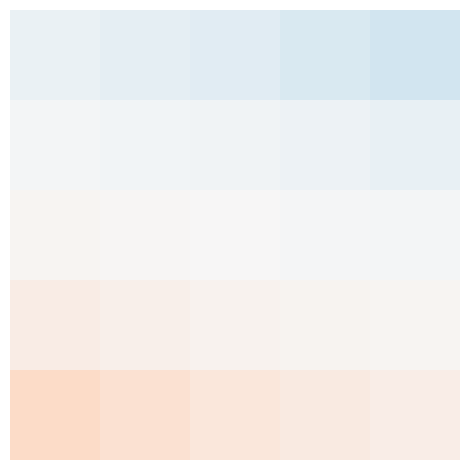

In [126]:
for k=1:1:K
    θ = π*(k-1)/K
    temp2d[:,:,k] = LamKernels.kern_d(σ_2, θ)
end
Utils.save_orientations_rb(temp2d, "kern_d")

## B (5x5)

$$[d]-[-d]$$


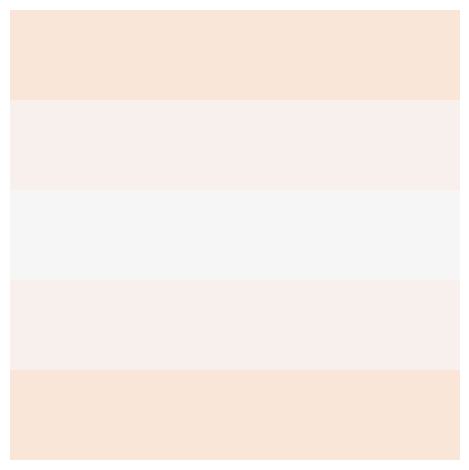

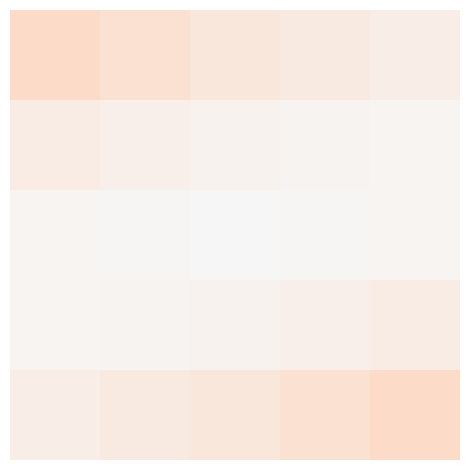

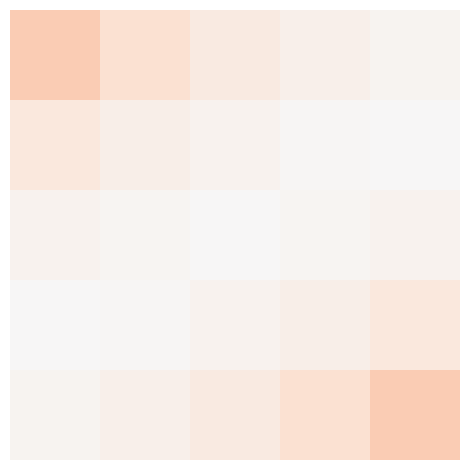

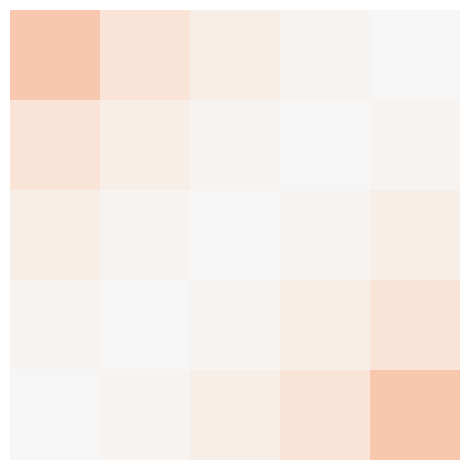

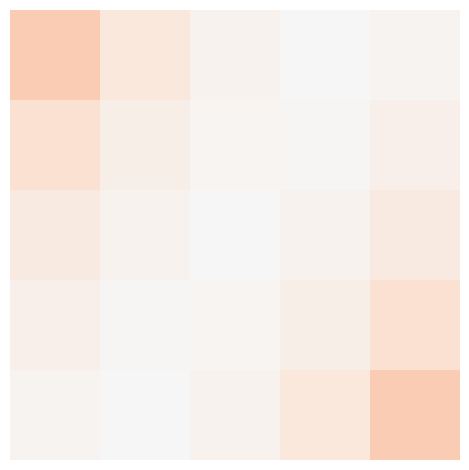

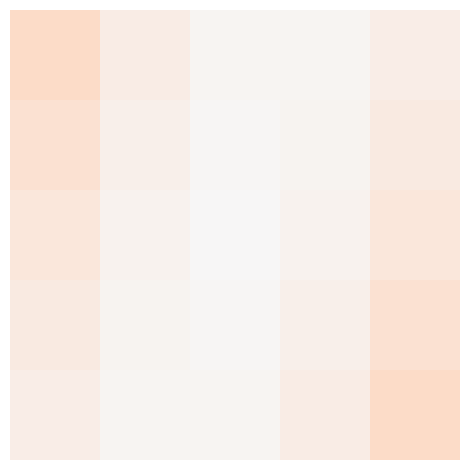

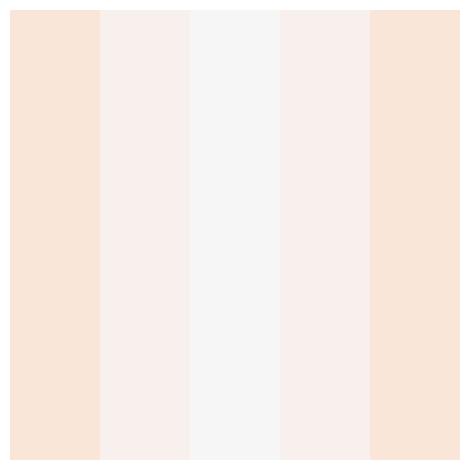

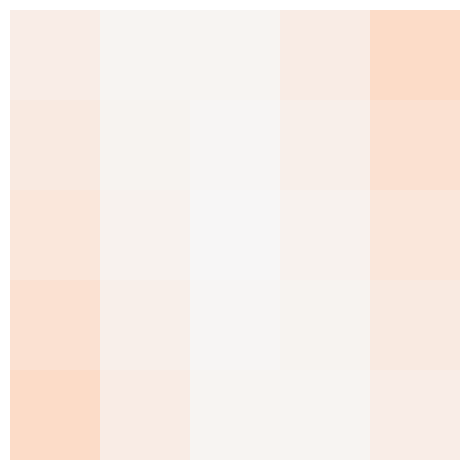

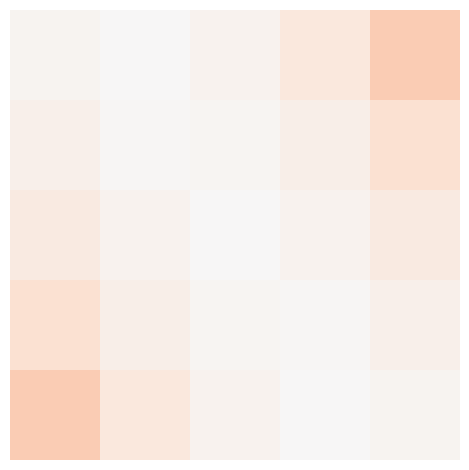

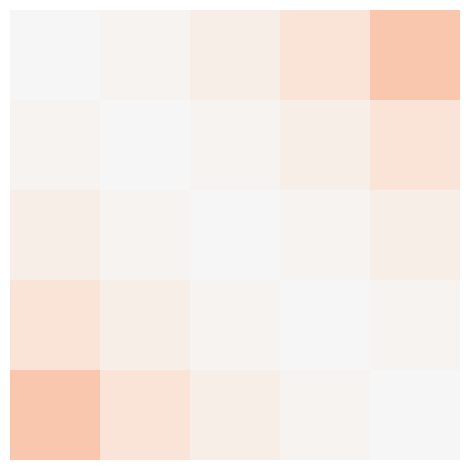

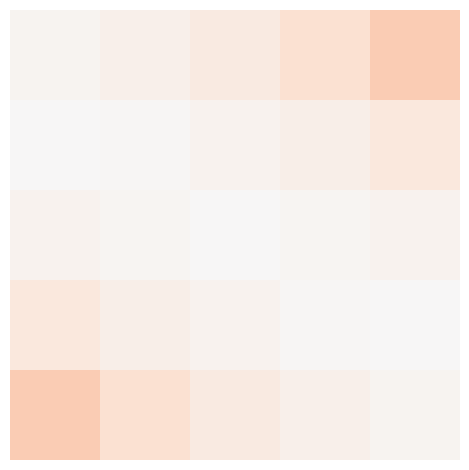

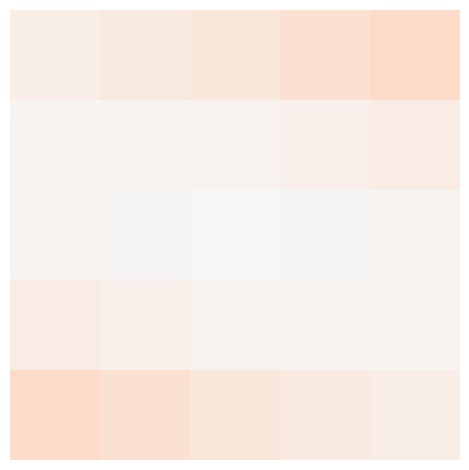

In [127]:
for k=1:1:K
    θ = π*(k-1)/K
    temp2d[:,:,k] = LamKernels.kern_b(σ_2, θ)
end
Utils.save_orientations_rb(temp2d, "kern_b")